# 1 CT Scan Images Clustering Analysis

## 1.1 CT Images Data Import

In [ ]:
### directly download data files from Google drive
! pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

import numpy as np
import pandas as pd

file_id = "1TdK087dkFUA6X1yMySX8tRYNM5CS_Rte"
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('CT_image_data.npz')
ct_img = np.load(file='CT_image_data.npz')

file_id = '1ViU_heTjGlWFADYNiqWmV_QEx3Ssxzks'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('CT_label.csv')
ct_label = pd.read_csv('CT_label.csv') 

# img_3d = ct_img["arr1"]
img_3d = ct_img["arr"]
print(img_3d.shape)
img_2d = img_3d.reshape(1533,224*224)
print(img_2d.shape)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
(1533, 224, 224)
(1533, 50176)


In [ ]:
cxr_label.head(1300)

,Unnamed: 0,sex,age,finding,location,filename
0,0,M,65.0,COVID-19,Vietnam,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1,1,M,65.0,COVID-19,Vietnam,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2,2,M,65.0,COVID-19,Vietnam,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3,3,M,65.0,COVID-19,Vietnam,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4,4,F,52.0,COVID-19,Taiwan,nejmc2001573_f1a.jpeg
...,...,...,...,...,...,...
1295,1295,M,37.0,Normal,United States,CheXpert-v1.0-small/train/patient01353/study1/...
1296,1296,M,54.0,Normal,United States,CheXpert-v1.0-small/train/patient01358/study1/...
1297,1297,M,39.0,Normal,United States,CheXpert-v1.0-small/train/patient01360/study1/...
1298,1298,F,32.0,Normal,United States,CheXpert-v1.0-small/train/patient01361/study1/...


## 1.2 CT Scan Clustering for Each Label

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=0.95)
Xpca = pca.fit_transform(img_2d)
Xtsne = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(Xpca)

df = pd.DataFrame(Xtsne, columns=["x1", "x2"])
df["country"] = ct_label["country"]
df["label"] = ct_label["finding"]

covid = df[df["label"]=="COVID-19"]
normal = df[df["label"]=="Normal"]
pneu = df[df["label"]=="Pneumonia"]


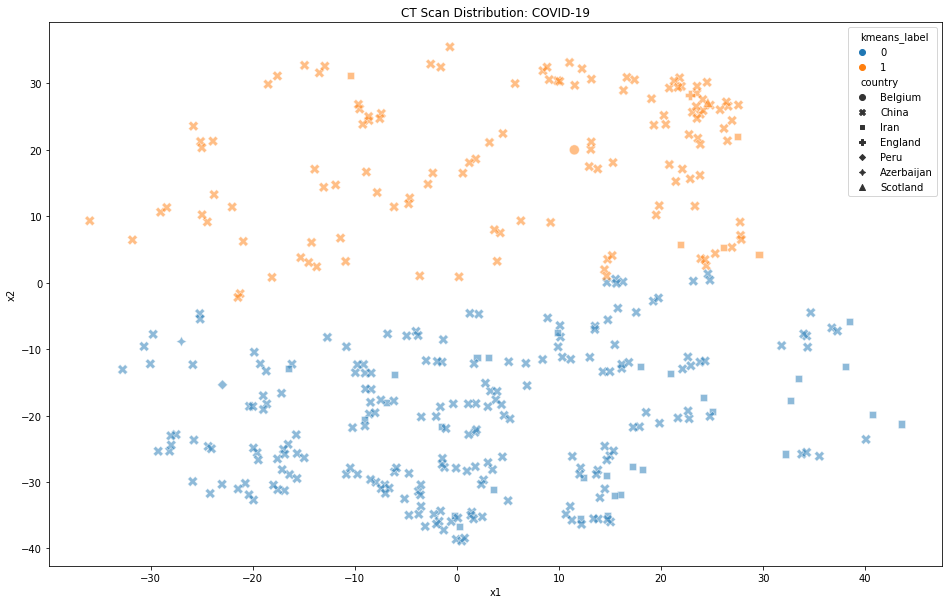

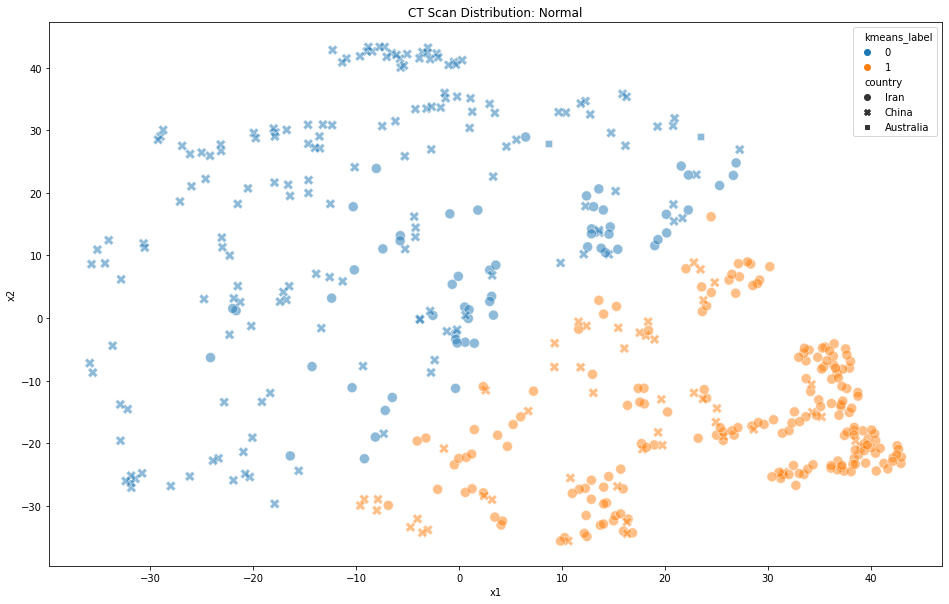

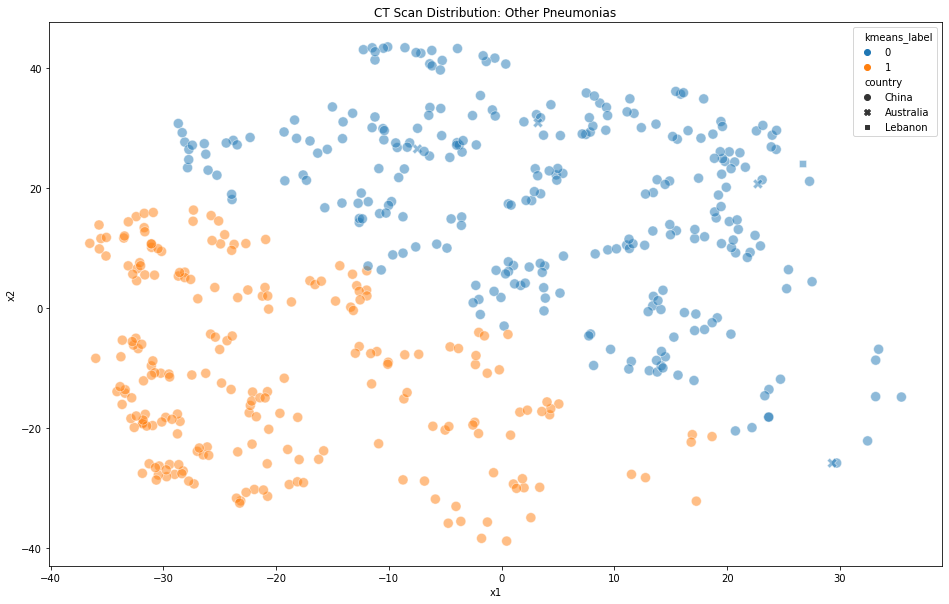

In [ ]:
from sklearn.cluster import KMeans
import warnings
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
import matplotlib.pyplot as plt
import seaborn as sns

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

kmeans_covid = KMeans(n_clusters=2, random_state=42).fit(covid[["x1", "x2"]])
kmeans_normal = KMeans(n_clusters=2, random_state=42).fit(normal[["x1", "x2"]])
kmeans_pneu = KMeans(n_clusters=2, random_state=42).fit(pneu[["x1", "x2"]])
covid["kmeans_label"] = kmeans_covid.labels_
normal["kmeans_label"] = kmeans_normal.labels_
pneu["kmeans_label"] = kmeans_pneu.labels_

datasets = [covid, normal, pneu]
title = ["COVID-19", "Normal", "Other Pneumonias"]

for i in range(0, 3):
    plt.figure(figsize=(16,10))

    sns.scatterplot(
        x="x1", y="x2",
        hue="kmeans_label",
        style="country",
        data=datasets[i],
        s = 100,
        alpha=0.5
    )
    plt.title("CT Scan Distribution: " + title[i])

## 1.3 CT Scan 50 Sample Distribution

Text(0.5, 1.0, 'CT Scan Sample Distribution - 50 samples from each label')

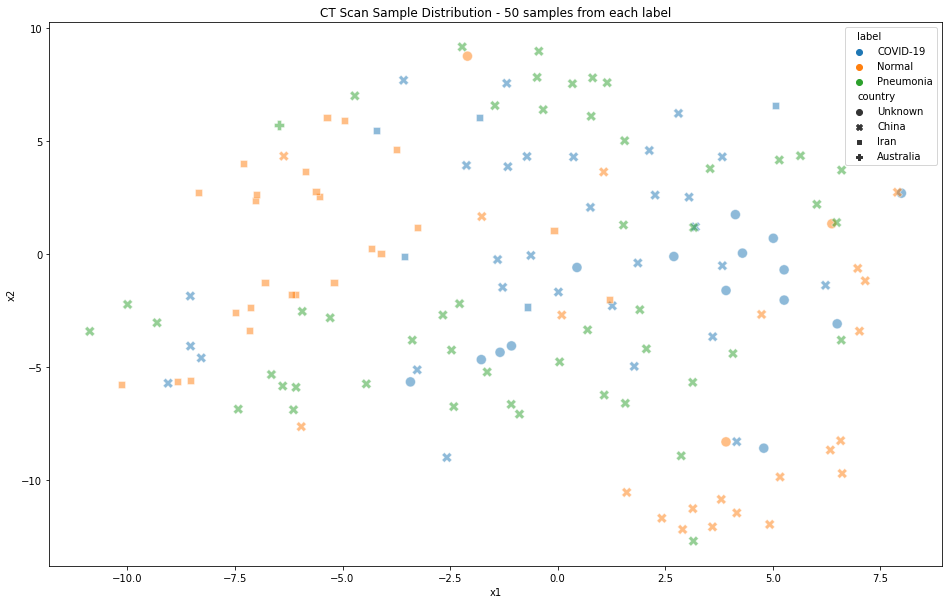

In [ ]:
import warnings
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


df=pd.DataFrame(img_2d)
df["country"] = ct_label["country"]
df["label"] = ct_label["finding"]
df.loc[df["country"].isna(), "country"] = "Unknown"


covid_sample = df[df["label"]=="COVID-19"].sample(n=50)
normal_sample = df[df["label"]=="Normal"].sample(n=50)
pneu_sample = df[df["label"]=="Pneumonia"].sample(n=50)

sample=pd.concat([covid_sample, normal_sample, pneu_sample])
country = sample["country"]
label=sample["label"]

sample.drop(columns=["country", "label"], inplace=True)

sample_pca = PCA(n_components=0.95).fit_transform(sample)
sample_tsne = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(sample_pca)
sample_tsne = pd.DataFrame(sample_tsne, columns=["x1", "x2"])
sample_tsne["country"] = country.tolist()
sample_tsne["label"] = label.tolist()

plt.figure(figsize=(16,10))
sns.scatterplot(
        x="x1", y="x2",
        hue="label",
        style="country",
        data=sample_tsne,
        s = 100,
        alpha=0.5
    )
plt.title("CT Scan Sample Distribution - 50 samples from each label")

# 2 CXR Images Clustering Analysis

## 2.1 CXR Images Data Import

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

import numpy as np
import pandas as pd

# npz
file_id = '1-FfWliNgVmi7sHNUKoierGTpK2pMbYqW'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('CXR_image.npz')
cxr_img = np.load(file='CXR_image.npz')

# csv
file_id = "1-K9DlBfH0GjS5Ous1KHJiSnGgH8ZlSPR"
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('CXR_label.csv')
cxr_label = pd.read_csv('CXR_label.csv')

cxr_label.loc[cxr_label["location"].isna(), "location"] = "Unknown"
cxr_label["location"] = [location.strip() for location in cxr_label["location"]]


img_3d = cxr_img["arr"]
img_2d = img_3d.reshape(1533,224*224)

## 2.2 CXR Clustering for Each Label

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=0.95)
Xpca = pca.fit_transform(img_2d)
Xtsne = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(Xpca)

df = pd.DataFrame(Xtsne, columns=["x1", "x2"])
df["location"] = cxr_label["location"]
df["label"] = cxr_label["finding"]

covid = df[df["label"]=="COVID-19"]
normal = df[df["label"]=="Normal"]
pneu = df[df["label"]=="Pneumonia"]

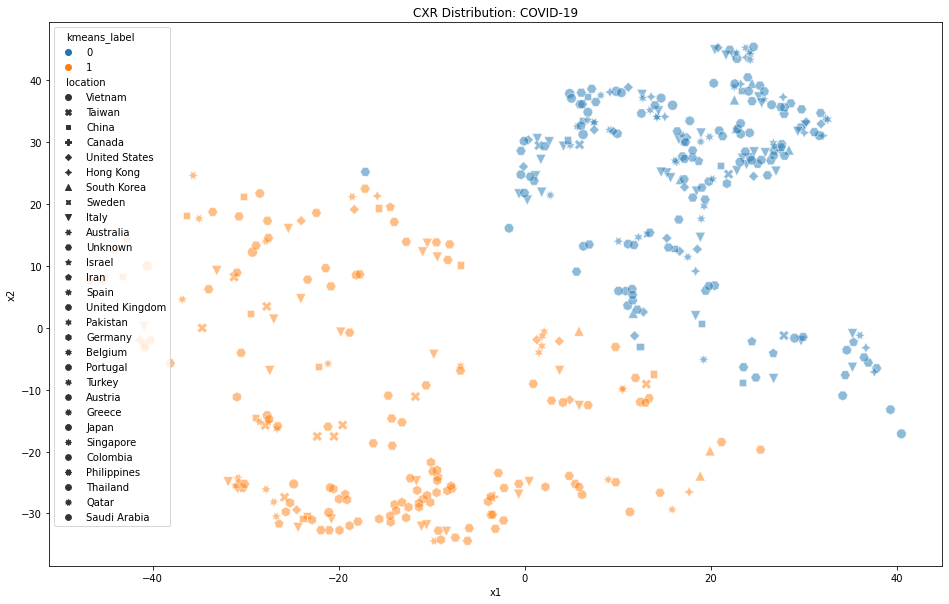

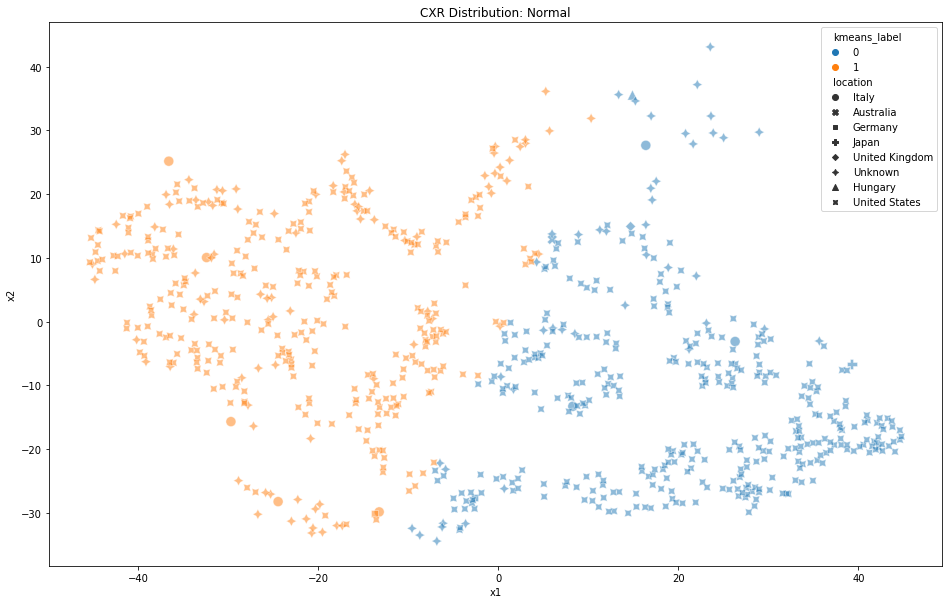

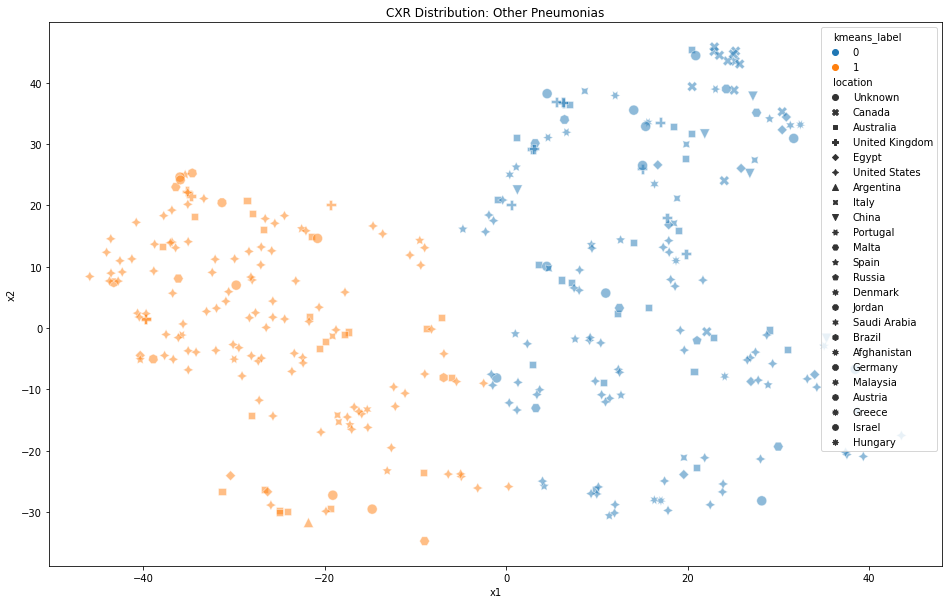

In [ ]:
from sklearn.cluster import KMeans
import warnings
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
import matplotlib.pyplot as plt
import seaborn as sns

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

kmeans_covid = KMeans(n_clusters=2, random_state=42).fit(covid[["x1", "x2"]])
kmeans_normal = KMeans(n_clusters=2, random_state=42).fit(normal[["x1", "x2"]])
kmeans_pneu = KMeans(n_clusters=2, random_state=42).fit(pneu[["x1", "x2"]])
covid["kmeans_label"] = kmeans_covid.labels_
normal["kmeans_label"] = kmeans_normal.labels_
pneu["kmeans_label"] = kmeans_pneu.labels_

datasets = [covid, normal, pneu]
title = ["COVID-19", "Normal", "Other Pneumonias"]

for i in range(0, 3):
    plt.figure(figsize=(16,10))

    sns.scatterplot(
        x="x1", y="x2",
        hue="kmeans_label",
        style="location",
        data=datasets[i],
        s = 100,
        alpha=0.5
    )
    plt.title("CXR Distribution: " + title[i])

## 2.3 CXR 50 Sample Distribution

(150, 74)
(150, 2)
(150, 2)
['COVID-19' 'Normal' 'Pneumonia']


Text(0.5, 1.0, 'CXR Sample Distribution - 50 samples from each label')

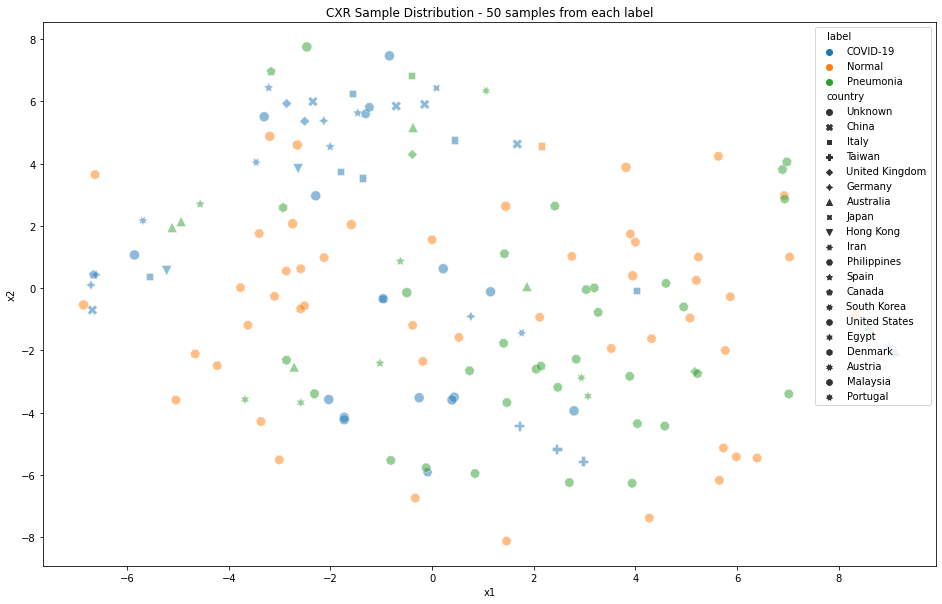

In [ ]:
df=pd.DataFrame(img_2d)
df["country"] = cxr_label["location"]
df["label"] = cxr_label["finding"]

covid_sample = df[df["label"]=="COVID-19"].sample(n=50)
normal_sample = df[df["label"]=="Normal"].sample(n=50)
pneu_sample = df[df["label"]=="Pneumonia"].sample(n=50)

sample=pd.concat([covid_sample, normal_sample, pneu_sample])

country = sample["country"]
label=sample["label"]

sample.drop(columns=["country", "label"], inplace=True)

sample_pca = PCA(n_components=0.95).fit_transform(sample)
print(sample_pca.shape)

sample_tsne = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(sample_pca)
print(sample_tsne.shape)

sample_tsne = pd.DataFrame(sample_tsne, columns=["x1", "x2"])
print(sample_tsne.shape)
sample_tsne["country"] = country.tolist()
sample_tsne["label"] = label.tolist()
print(sample_tsne["label"].unique())

plt.figure(figsize=(16,10))
sns.scatterplot(
        x="x1", y="x2",
        hue="label",
        style="country",
        data=sample_tsne,
        s = 100,
        alpha=0.5
    )
plt.title("CXR Sample Distribution - 50 samples from each label")